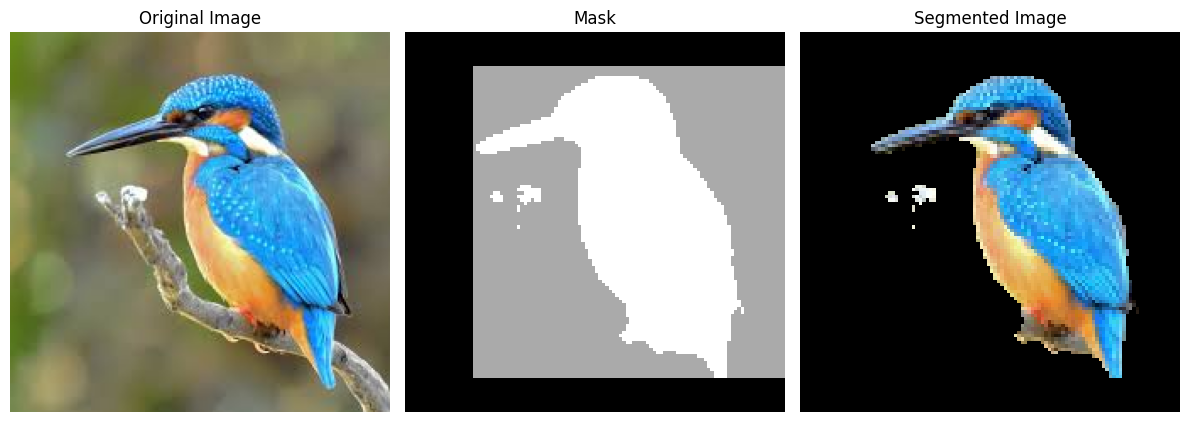

In [14]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the image
# image = cv2.imread('images.jpg')
# scale_percent = 50 
# width = int(image.shape[1] * scale_percent / 100)
# height = int(image.shape[0] * scale_percent / 100)
# dim = (width, height)

# resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
# resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# # Create a mask initialized to zero (background)
# mask = np.zeros(resized_image.shape[:2], np.uint8)

# # Create background and foreground models
# bgd_model = np.zeros((1, 65), np.float64)
# fgd_model = np.zeros((1, 65), np.float64)

# # Define a rectangle for the ROI (Region of Interest)
# rect = (20, 10, resized_image.shape[1] - 20, resized_image.shape[0] - 20)

# # Apply GrabCut algorithm with reduced iterations
# num_iterations = 1
# cv2.grabCut(resized_image, mask, rect, bgd_model, fgd_model, num_iterations, cv2.GC_INIT_WITH_RECT)

# # Modify mask: Set the values for background (0) and foreground (1)
# mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# # Create an output image
# segmented_image = resized_image * mask2[:, :, np.newaxis]

# # Resize segmented image back to original size
# segmented_image = cv2.resize(segmented_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)
# resized_image_rgb = cv2.resize(resized_image_rgb, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)

# # Display results
# plt.figure(figsize=(12, 8))

# plt.subplot(1, 3, 1)
# plt.title("Original Image")
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title("Mask")
# plt.imshow(mask, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.title("Segmented Image")
# plt.imshow(segmented_image)
# plt.axis('off')

# plt.tight_layout()
# plt.show()
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image
image = cv2.imread('images.jpg')
scale_percent = 50  # scaling percentage
dim = (int(image.shape[1] * scale_percent / 100), int(image.shape[0] * scale_percent / 100))
resized = cv2.resize(image, dim)

# Create mask and models for GrabCut
mask = np.zeros(resized.shape[:2], np.uint8)
bgd_model, fgd_model = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

#Define ROI and apply GrabCut
rect = (20, 10, resized.shape[1] - 20, resized.shape[0] - 20)
cv2.grabCut(resized, mask, rect, bgd_model, fgd_model, 1, cv2.GC_INIT_WITH_RECT)
segmented = resized * np.where((mask == 2) | (mask == 0), 0, 1)[:, :, np.newaxis]

# Convert segmented image to uint8 for displaying
segmented = segmented.astype('uint8')

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)); plt.title("Segmented Image"); plt.axis('off')

plt.subplot(1, 3, 2); plt.imshow(mask, cmap='gray'); plt.title("Mask"); plt.axis('off')
plt.tight_layout()
plt.show()

